# Perceptron Classfication for Iris Dataset
## import package

In [1]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

## Perceptron Algorithm

In [2]:
class Perceptron():
    def __init__(self, thresholds=0.0, eta=0.01, n_iter=10):
        self.thresholds = thresholds
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1+X. shape[1])
        self.errors_ = []

        for i in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target-self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            print(self.w_)
        return self

    def net_input(self, X):
        return np. dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) > self.thresholds, 1, -1)

## Simple EDA

In [3]:
df = pd.read_csv('../input/iris.data', header=None)

In [4]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
y = df.iloc[0:100, 4].values
y = np.where(y=='Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values

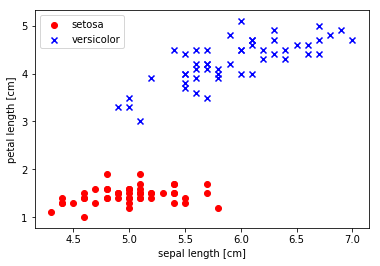

In [6]:
plt.scatter(X[:50, 0], X[:50, 1], color='r', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='b', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [7]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
# setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        if cl==1:
            irisLabel = 'vsericolor'
        else:
            irisLabel = 'setosa'
            
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=irisLabel)

## Train the Perceptron Model

In [8]:
def TrainPerceptronModel(X, y):
    ppn = Perceptron(eta=0.1, n_iter=10)

    ppn.fit(X, y)
    print(ppn.errors_)

    plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Number of misclassifications')

    plt.tight_layout()
    # plt.savefig('./perceptron_1.png', dpi=300)
    plt.show()    
    
    
    plot_decision_regions(X, y, classifier=ppn)
    plt.xlabel('sepal length [cm]')
    plt.ylabel('petal length [cm]')
    plt.legend(loc='upper left')

    plt.tight_layout()
#     plt.savefig('./perceptron_2.png', dpi=300)
    plt.show()
    
    return ppn

[0.2  1.4  0.94]
[0.   0.8  1.32]
[-0.2  0.2  1.7]
[-0.2   0.32  2.12]
[-0.4  -0.7   1.84]
[-0.4  -0.7   1.84]
[-0.4  -0.7   1.84]
[-0.4  -0.7   1.84]
[-0.4  -0.7   1.84]
[-0.4  -0.7   1.84]
[1, 3, 3, 2, 1, 0, 0, 0, 0, 0]


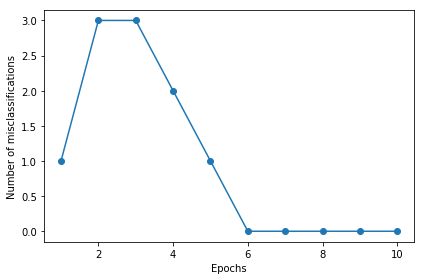

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


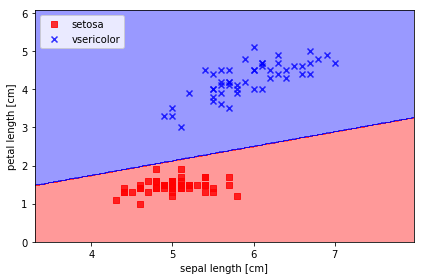

In [9]:
ppn = TrainPerceptronModel(X, y)

## Predict the new data

In [10]:
def getNewX():
    
    # n=int(input("Enter length of the list"))
    n = 2
    newX=[]
    for i in range(0, n):
        test=input("Enter the sepal & petal length you want to test\n")
        if(test.isdigit()):
            newX.insert(i,float(test)) #statement1
        else:
            newX.insert(i,test)        #statement2
    print('----------------------\nThe new data:',newX)
    
    return newX

In [11]:
def my_test():
    
    newX = getNewX()
    
    result = ppn.predict(newX)
    print('\n----------------------')
    if result==1:
        print('Your input data is classified as VERISCOLOR')
    else:
        print('Your input data is classified as SETOSA')

### Predict Result

- Sepal length: 6
- Petal length: 3

In [12]:
my_test()

Enter the sepal & petal length you want to test
6
Enter the sepal & petal length you want to test
3
----------------------
The new data: [6.0, 3.0]

----------------------
Your input data is classified as VERISCOLOR


When the (sepal length, petal length) is (6,3), the predicted result is **veriscolor**. According to the graph of veriscolor and setosa above, the above prediction results are reasonable.